In [ ]:
# Ming-Ru (Albert) Wu
# Monte Carlo Tree Search (MCTS) for Chess

In [1]:
import random
import chess
import math
from IPython.display import display, Image
random.seed(42)

PLAYER = chess.WHITE
OPPONENT = chess.BLACK
TrialsPerEpisode = 300
maxEpisode = 200

In [2]:
class TreeNode():
    def __init__(self, board):
        self.M = 0
        self.V = 0
        self.visitedMovesAndNodes = []
        self.nonVisitedLegalMoves = [] # = number of available(not being occupied) positions
        self.board = board
        self.board2 = board
        self.parent = None
        for m in self.board.legal_moves:
            if self.board.color_at(m.from_square) == self.board.turn:
                self.nonVisitedLegalMoves.append(m)

    def isMCTSLeafNode(self):
        return len(self.nonVisitedLegalMoves) != 0

    def isTerminalNode(self):
        return len(self.nonVisitedLegalMoves) == 0 and len(self.visitedMovesAndNodes) == 0

def uctValue(node, parent):
    val = (node.M/node.V) + 1.4142 * math.sqrt(math.log(parent.V) / node.V)
    #print(val)
    return val

def maxChild(node):
    maxUctChild = None
    maxUctValue = -1000000.
    for move, child in node.visitedMovesAndNodes:
        uctValChild = uctValue(child, node)
        if(uctValChild > maxUctValue):
            maxUctChild = child
            maxUctValue = uctValChild
    return maxUctChild

def select(node):
    if(node.isMCTSLeafNode() or node.isTerminalNode()):
        return node
    else:
        maxUctChild = maxChild(node)
        if(maxUctChild == None):
            raise ValueError("no child with best uct value")
        else:
            return select(maxUctChild)

def expand(node):
    moveToExpand = node.nonVisitedLegalMoves.pop()
    board.push(moveToExpand)  # push{} will update board.turn
      
    childNode = TreeNode(board)
    childNode.parent = node
    node.visitedMovesAndNodes.append((moveToExpand, childNode))
    return childNode

def game(board, x):
    score = []
    mov = []
    for m in board.legal_moves:
        if board.color_at(m.from_square) == board.turn: 
            mov.append(m)
            
            p = board.piece_at(m.to_square)
            if p == None: # empty square
                score.append(0)
            else:
                score.append(p.piece_type)    # for greedy            
                # piece_type: [Pawn,Knight,Bishop,Rook,Queen,King]=[1,2,3,4,5,6]

    # greedy search
    MaxScore = -100
    action = -1
    for i in range(len(score)):
        if score[i] > MaxScore:
            MaxScore = score[i]
            action = i
        elif score[i] == MaxScore:
            if random.random() > 0.5:
                MaxScore = score[i]
                action = i       
                
    gameOver = board.is_game_over()
    b2 = board.copy()
    if (not gameOver) and action >= 0:
        move = mov[action]           # capture the most important piece
        #move = random.choice(ls)    # select a random legal move
        board.push(move)
        b2 = board.copy()
    return gameOver, b2

    
def simulate(node):
    board1 = node.board.copy()
    board2 = node.board.copy()
    o = None
    cnt = 0
    while cnt<100:
        cnt += 1
        gameEnd, board1 = game(board2, cnt)
        if gameEnd: 
            o = board1.outcome(claim_draw = True)
            if(o == None):
                return 0.5            
            break

        cnt += 1
        gameEnd, board2 = game(board1, cnt)
        if gameEnd:
            o = board2.outcome(claim_draw = True)
            if(o == None):
                return 0.5            
            break
    
    payout = 0.5
    if(o == None):
        return 0.5
    if(o.winner == PLAYER):
        payout = 1
    elif(o.winner == OPPONENT):
        payout = 0
    elif(o.winner == None):
        payout = 0.5
    return payout

def backpropagate(node, payout):
    #node.M = ((node.M * node.V) + payout) / (node.V + 1)
    node.M = node.M + payout # M is the win/loss information
    node.V = node.V + 1      # V is the total round
    # not at the root node yet
    if(node.parent != None):
        return backpropagate(node.parent, payout)

In [3]:
def bestMove(node):
    maxUctChild = None
    maxMove = None
    maxUctValue = -1000000.
    for move, child in node.visitedMovesAndNodes:
        uctValChild = uctValue(child, node)
        if(uctValChild > maxUctValue):
            maxUctChild = child
            maxUctValue = uctValChild
            maxMove = move
    return maxUctChild, maxMove

In [4]:
def mctsNext(root):
    for i in range(0,TrialsPerEpisode):
        node = select(root)
        if(not node.isTerminalNode()):
            node = expand(node)
        payout = simulate(node)
        backpropagate(node, payout)
        
    return bestMove(root)

In [5]:
board = chess.Board()
#board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
'''
board.push_uci("e2e4")
board.push_uci("e7e6")
board.push_uci("d2d4")
board.push_uci("d7d5")
board.push_uci("b1c3")
board.push_uci("g8f6")
board.push_uci("e4e5")
board.push_uci("f6d7")
board.push_uci("g1f3")
board.push_uci("f8b4")
board.push_uci("f1d3")
board.push_uci("e8g8")
'''
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [6]:
board.turn = chess.WHITE
root = TreeNode(board)
print(len(root.nonVisitedLegalMoves))

20



episode  1   color: True


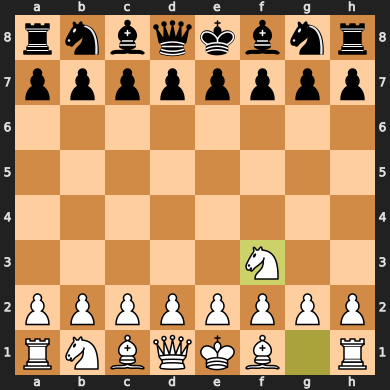


episode  2   color: False


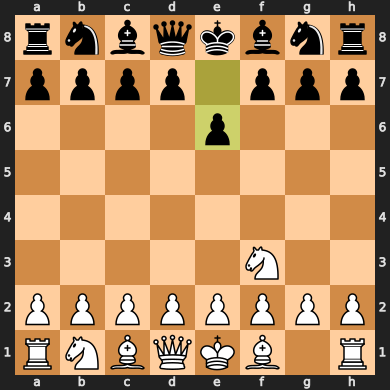


episode  3   color: True


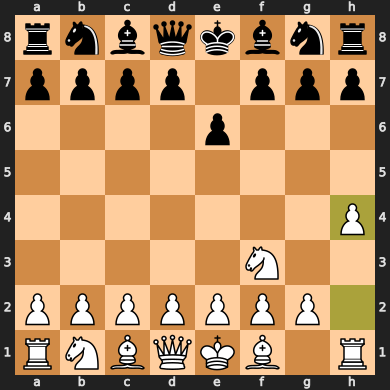


episode  4   color: False


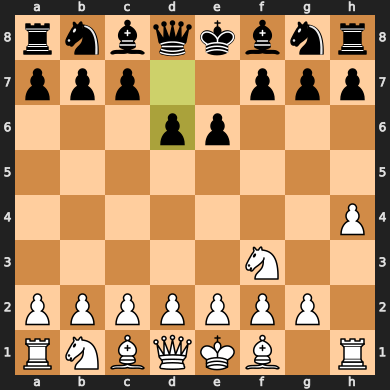


episode  5   color: True


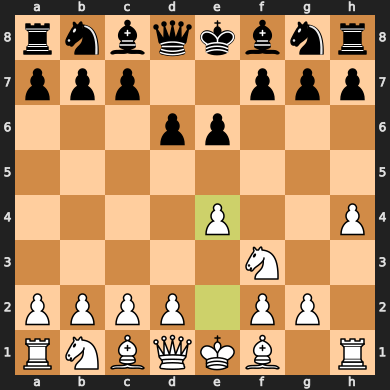


episode  6   color: False


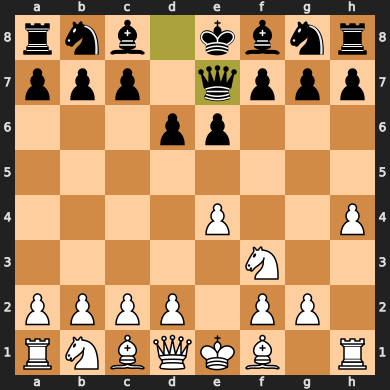


episode  7   color: True


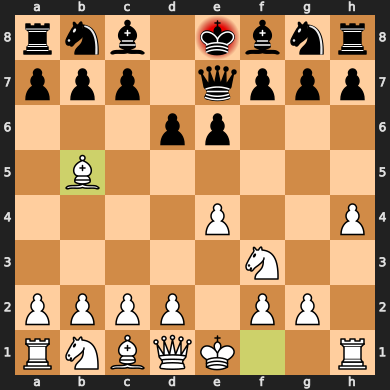


episode  8   color: False


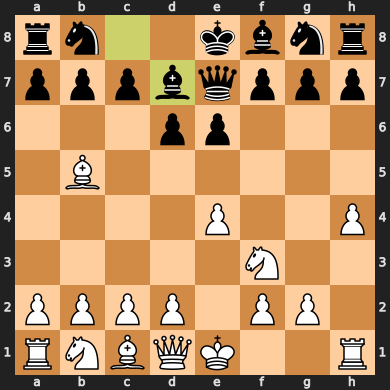


episode  9   color: True


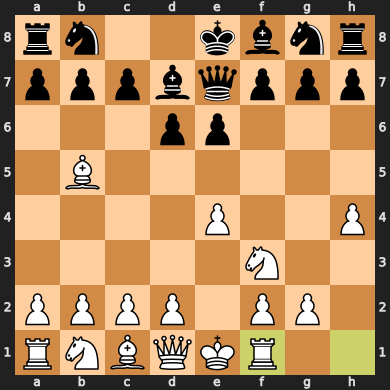


episode  10   color: False


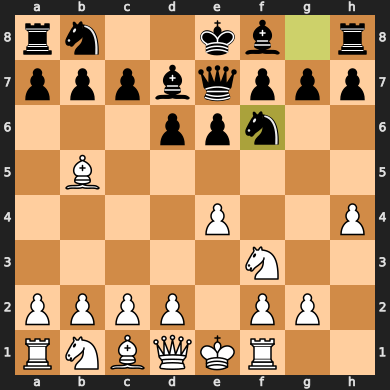


episode  11   color: True


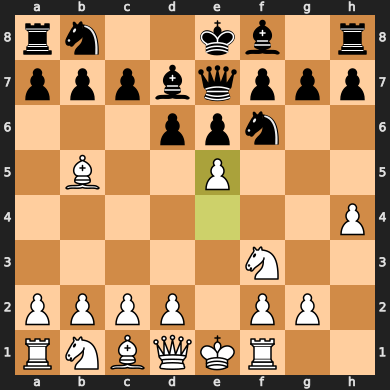


episode  12   color: False


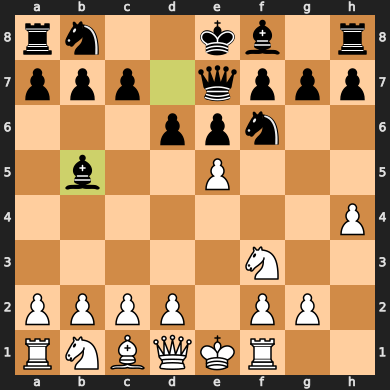


episode  13   color: True


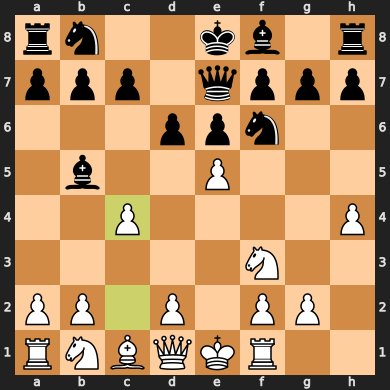


episode  14   color: False


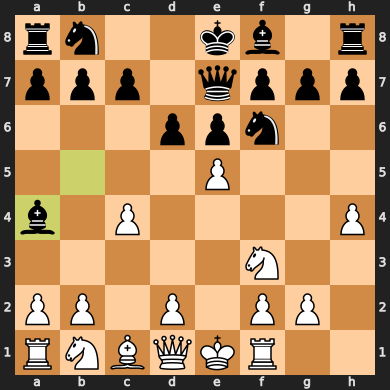


episode  15   color: True


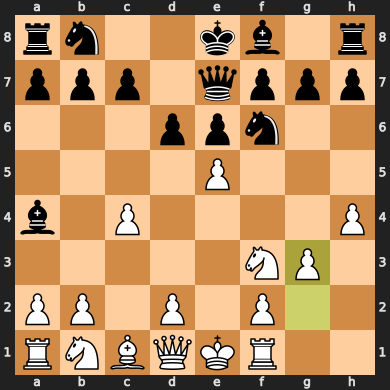


episode  16   color: False


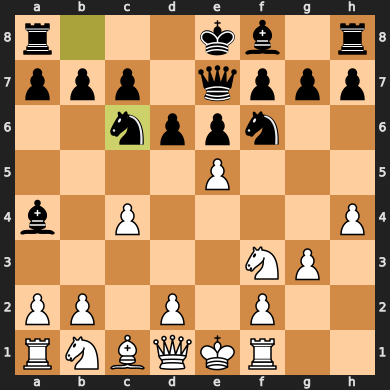


episode  17   color: True


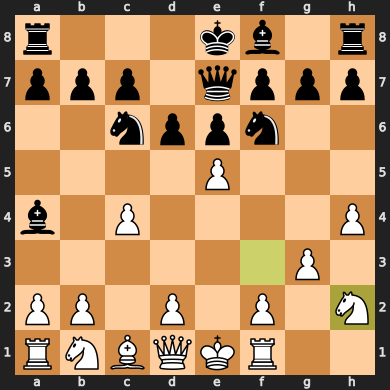


episode  18   color: False


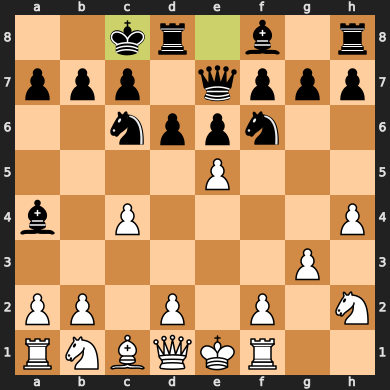


episode  19   color: True


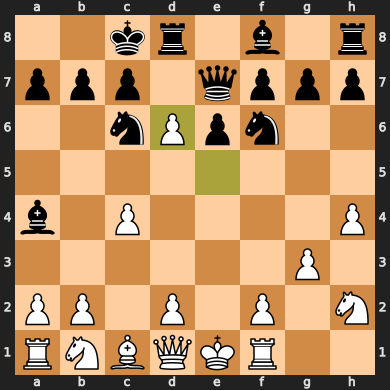


episode  20   color: False


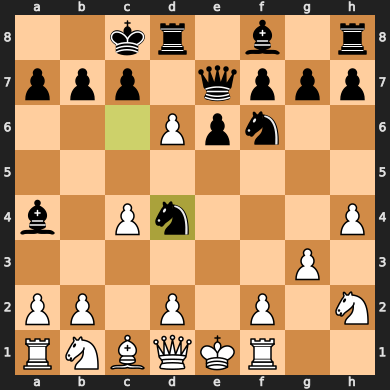


episode  21   color: True


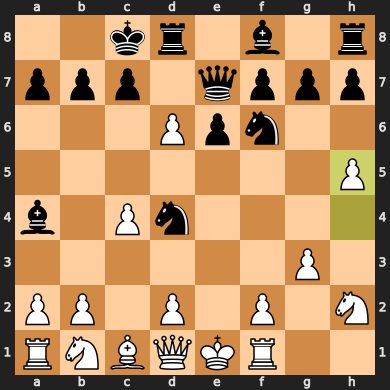


episode  22   color: False


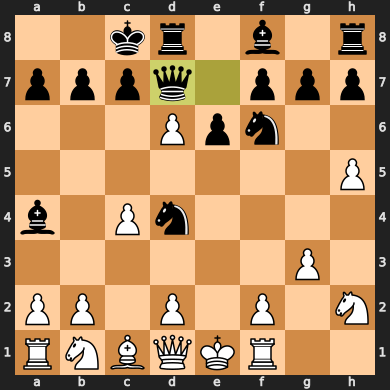


episode  23   color: True


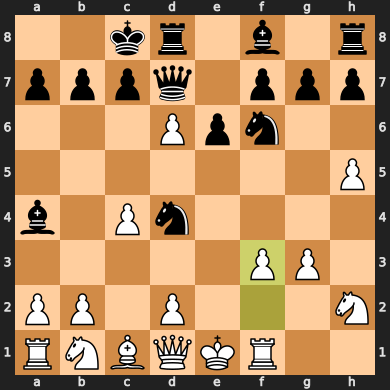


episode  24   color: False


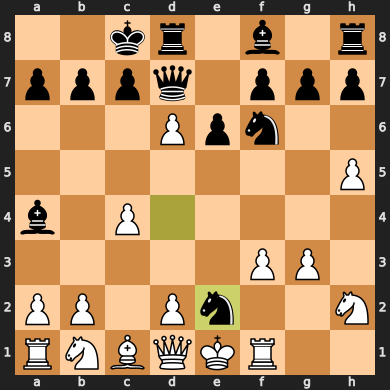


episode  25   color: True


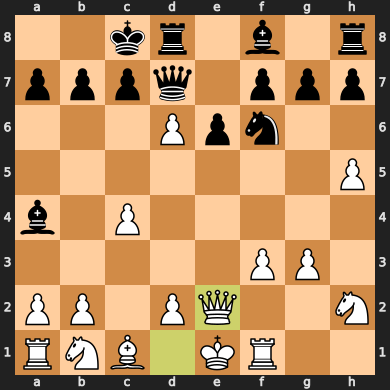


episode  26   color: False


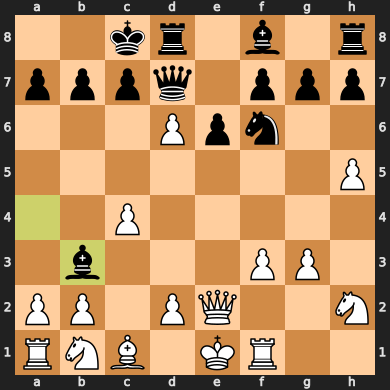


episode  27   color: True


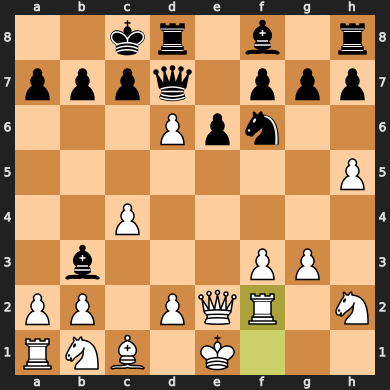


episode  28   color: False


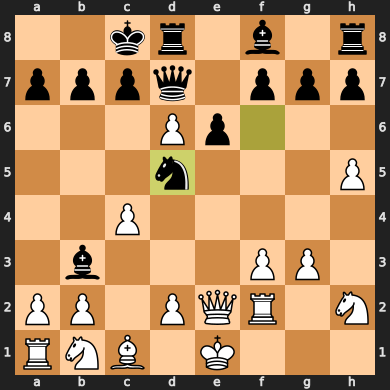


episode  29   color: True


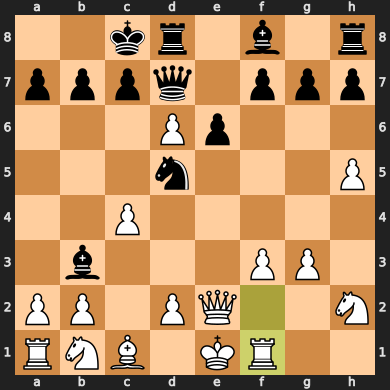


episode  30   color: False


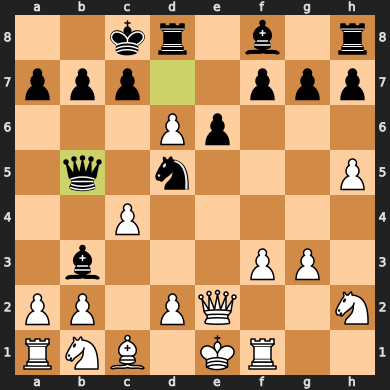


episode  31   color: True


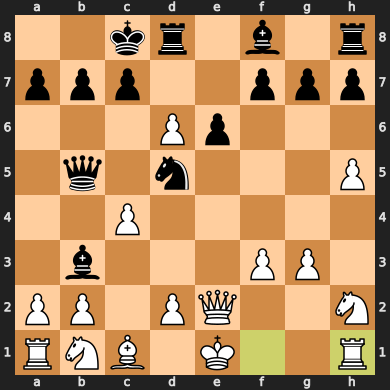


episode  32   color: False


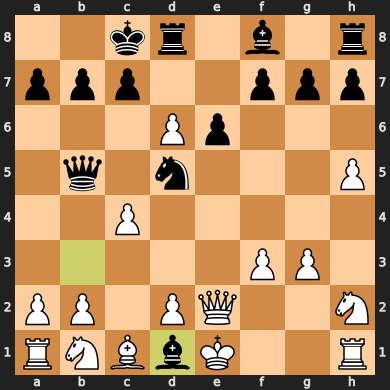


episode  33   color: True


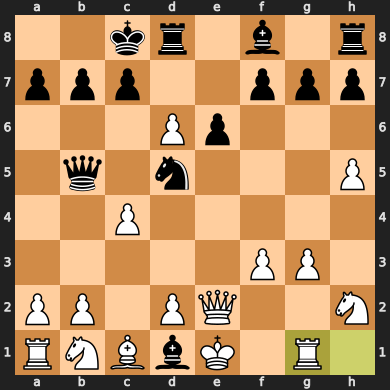


episode  34   color: False


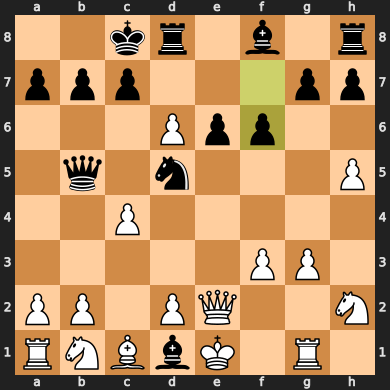


episode  35   color: True


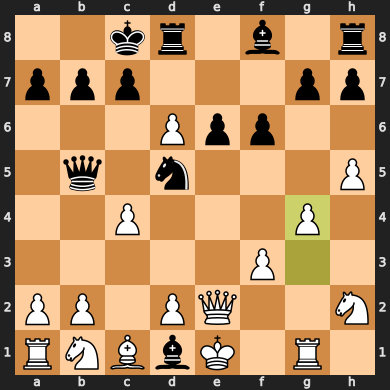


episode  36   color: False


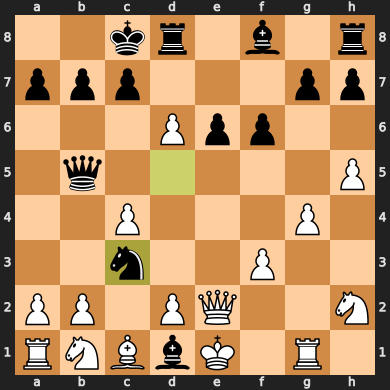


episode  37   color: True


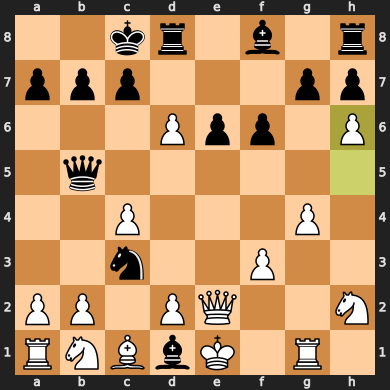


episode  38   color: False


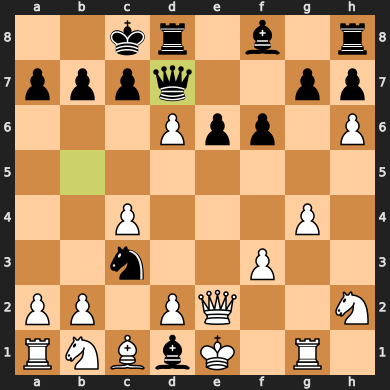


episode  39   color: True


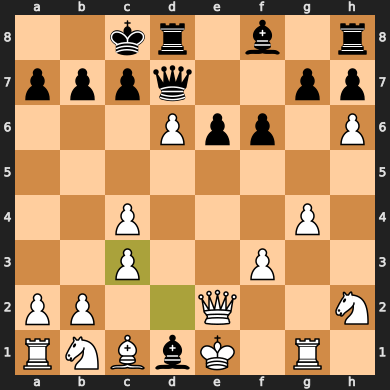


episode  40   color: False


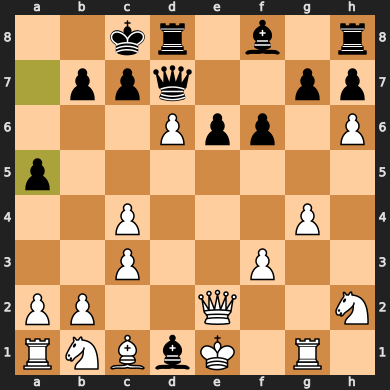


episode  41   color: True


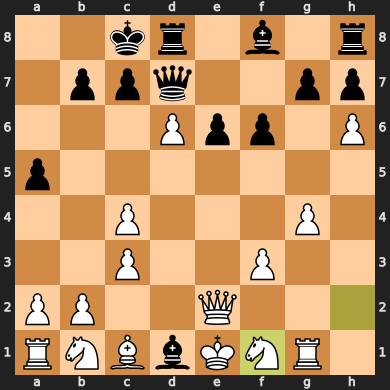


episode  42   color: False


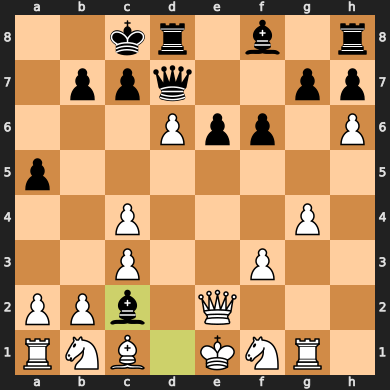


episode  43   color: True


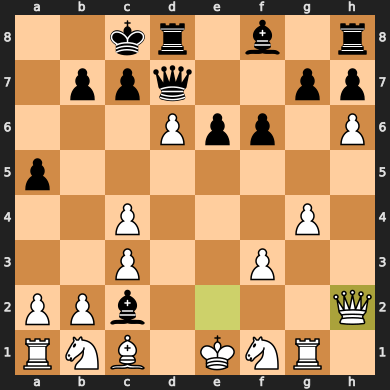


episode  44   color: False


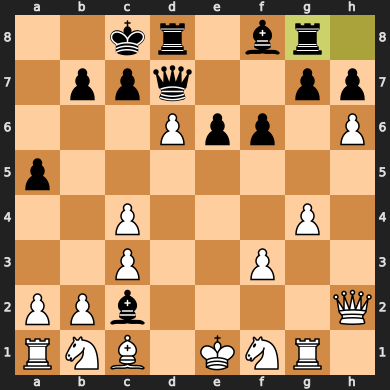


episode  45   color: True


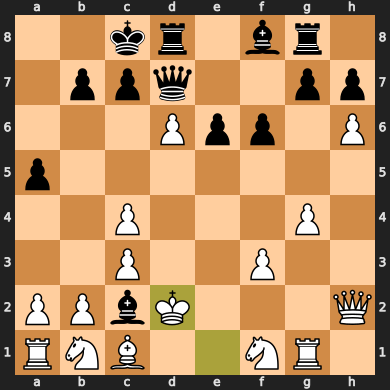


episode  46   color: False


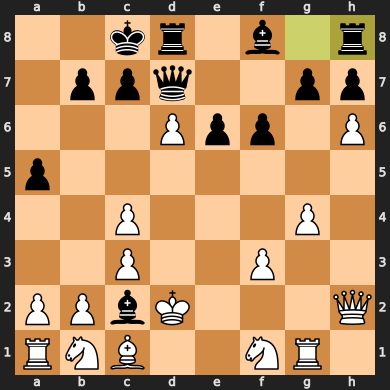


episode  47   color: True


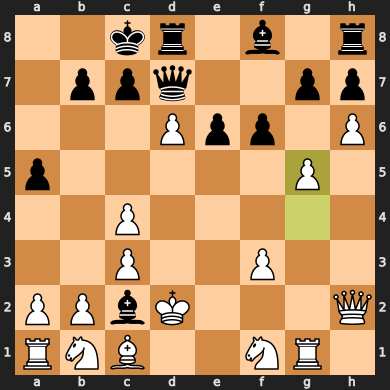


episode  48   color: False


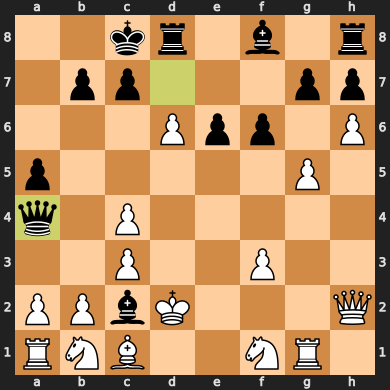


episode  49   color: True


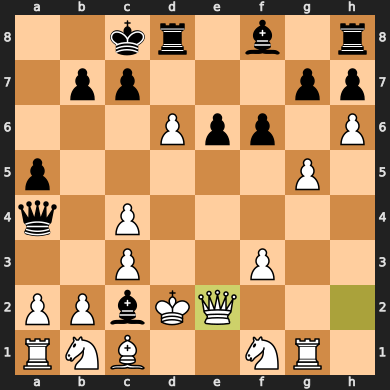


episode  50   color: False


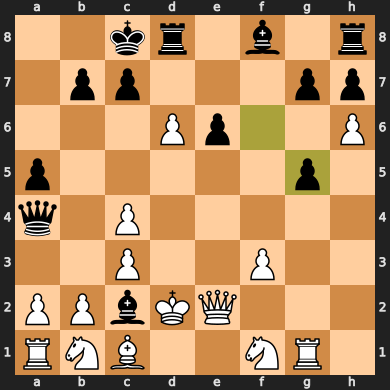


episode  51   color: True


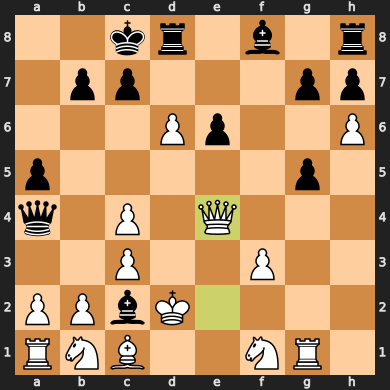


episode  52   color: False


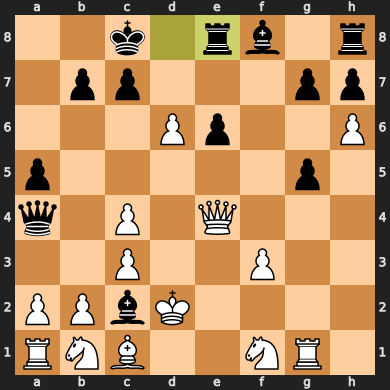


episode  53   color: True


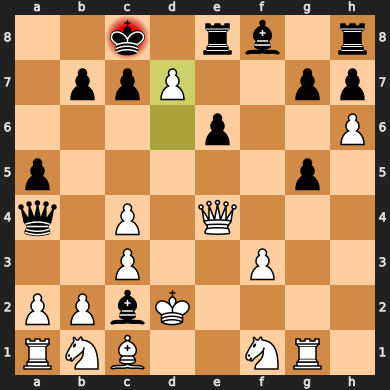


episode  54   color: False


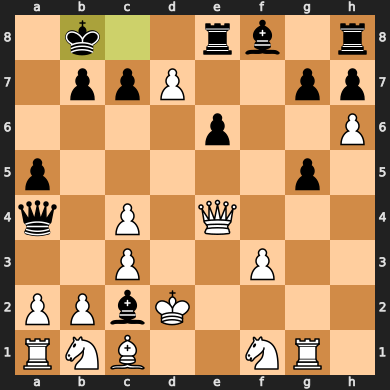


episode  55   color: True


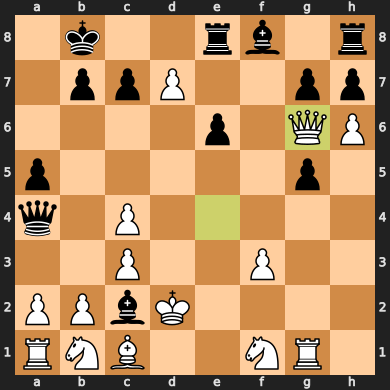


episode  56   color: False


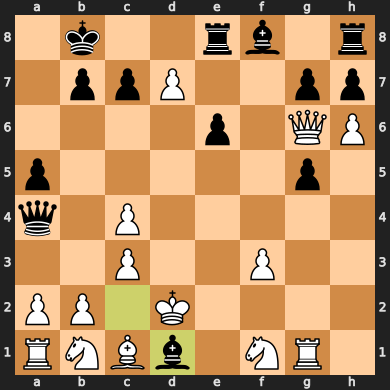


episode  57   color: True


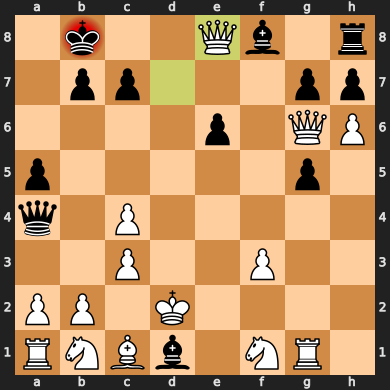


episode  58   color: False


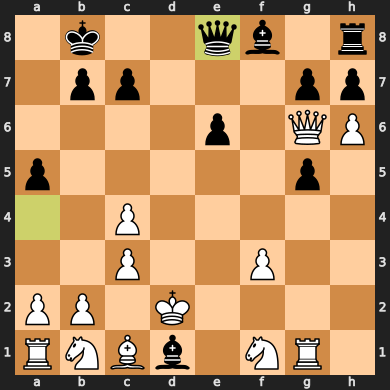


episode  59   color: True


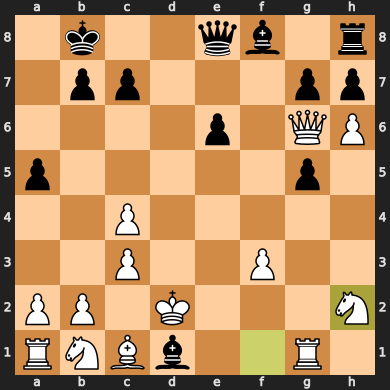


episode  60   color: False


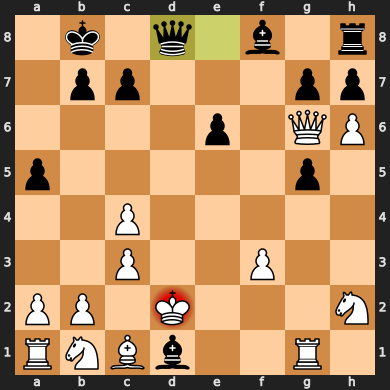


episode  61   color: True


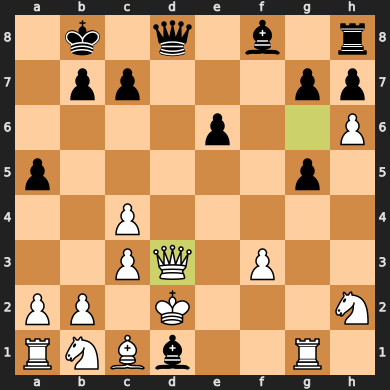


episode  62   color: False


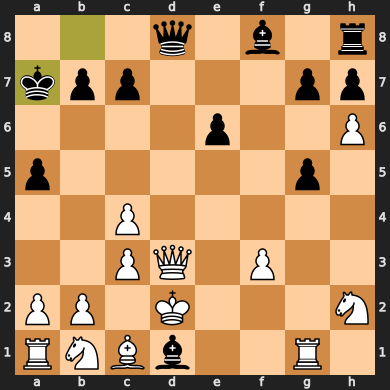


episode  63   color: True


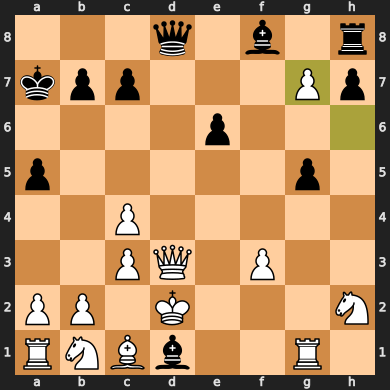


episode  64   color: False


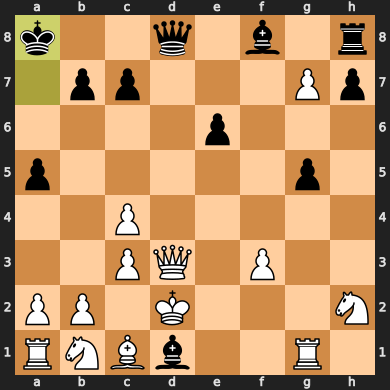


episode  65   color: True


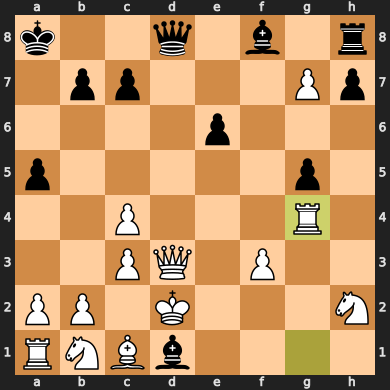


episode  66   color: False


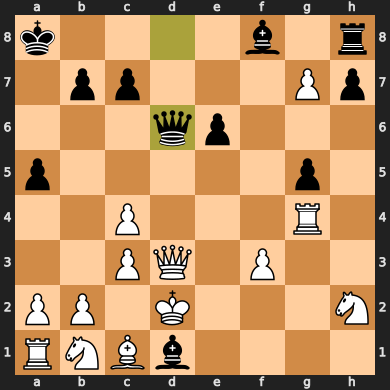


episode  67   color: True


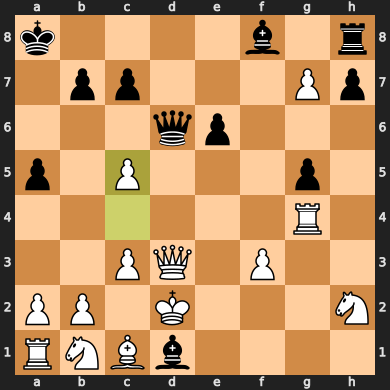


episode  68   color: False


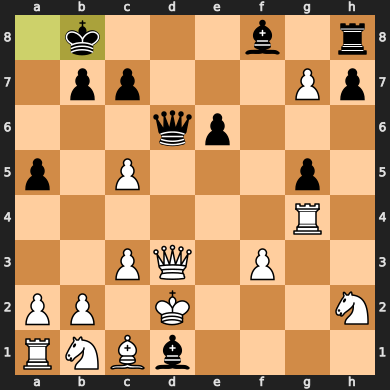


episode  69   color: True


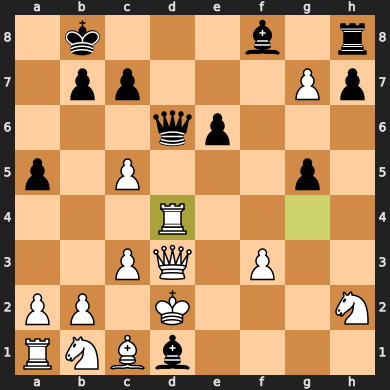


episode  70   color: False


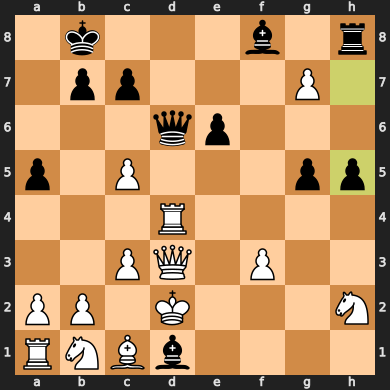


episode  71   color: True


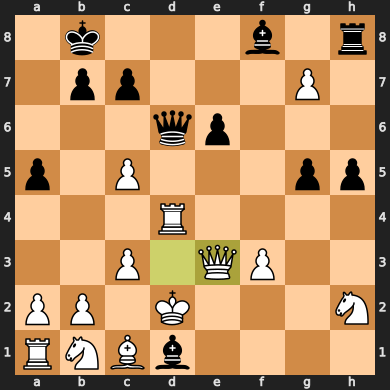


episode  72   color: False


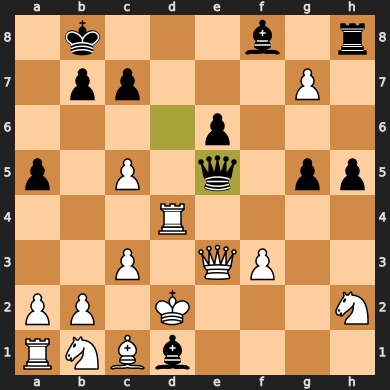


episode  73   color: True


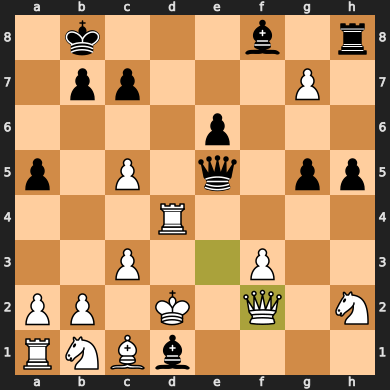


episode  74   color: False


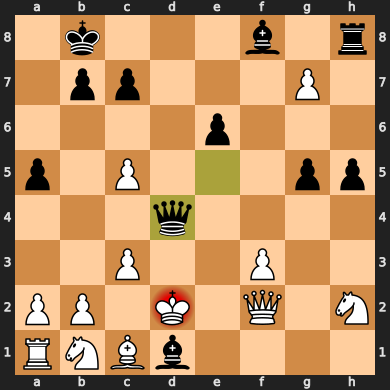


episode  75   color: True


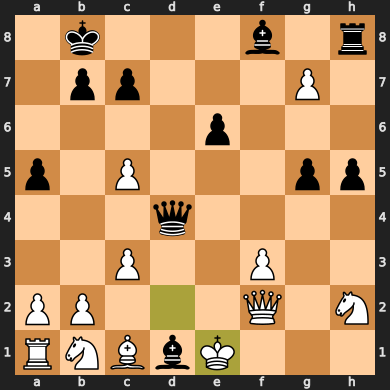


episode  76   color: False


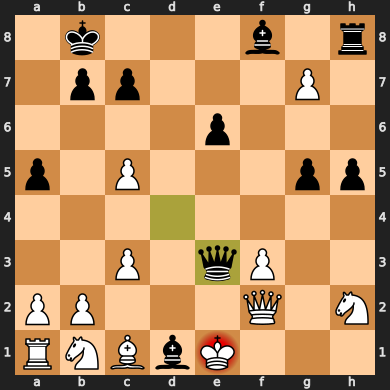


episode  77   color: True


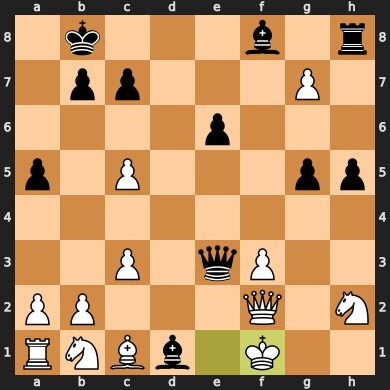


episode  78   color: False


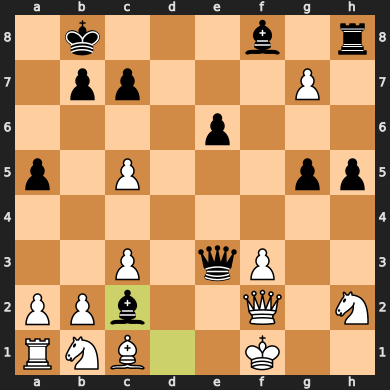


episode  79   color: True


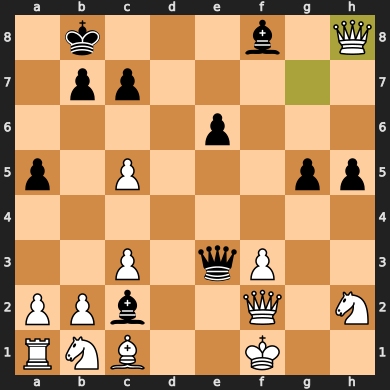


episode  80   color: False


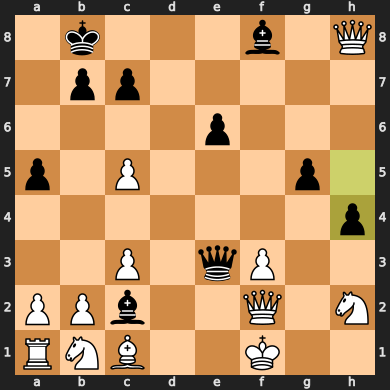


episode  81   color: True


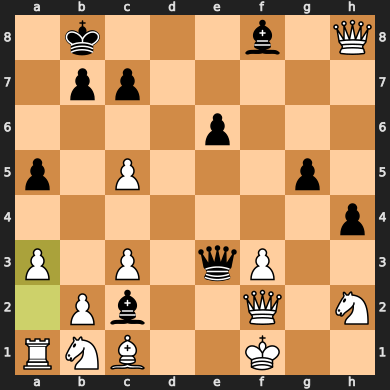


episode  82   color: False


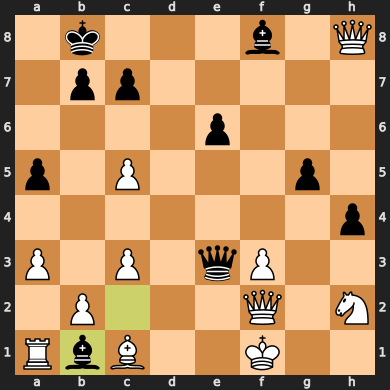


episode  83   color: True


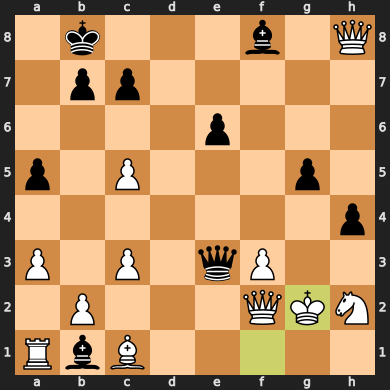


episode  84   color: False


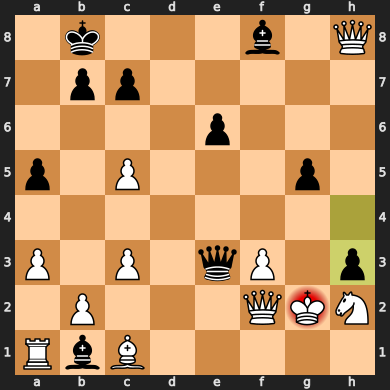


episode  85   color: True


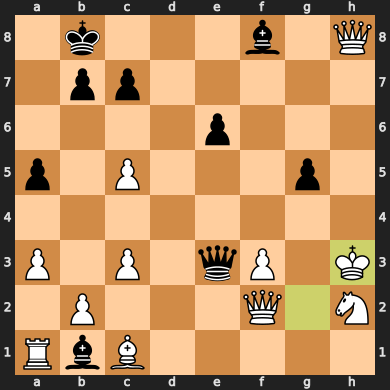


episode  86   color: False


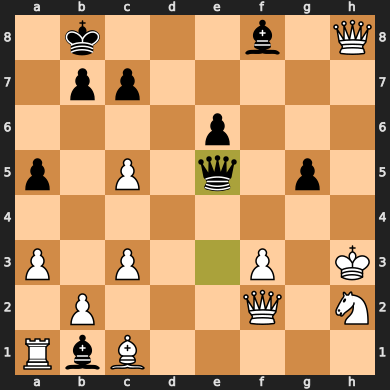


episode  87   color: True


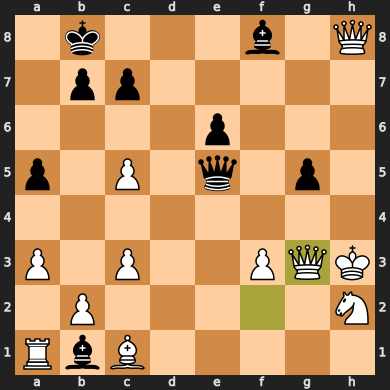


episode  88   color: False


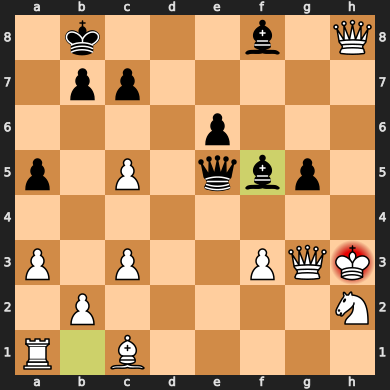


episode  89   color: True


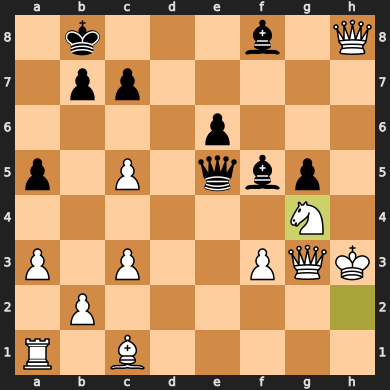


episode  90   color: False


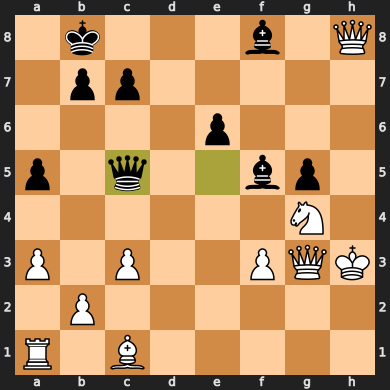


episode  91   color: True


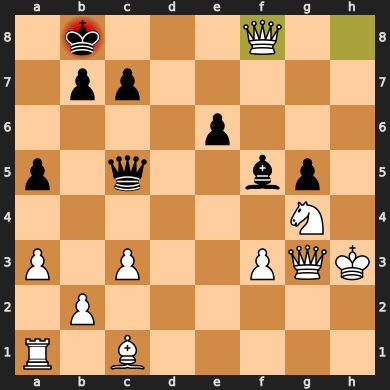


episode  92   color: False


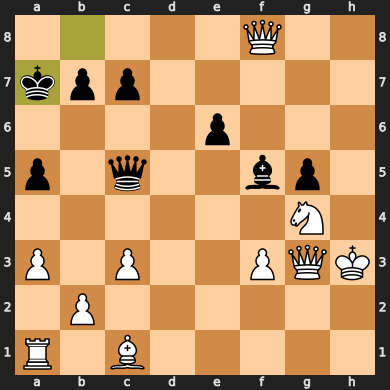


episode  93   color: True


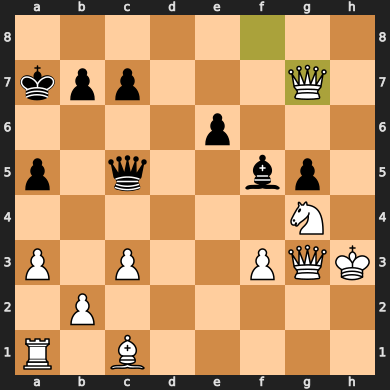


episode  94   color: False


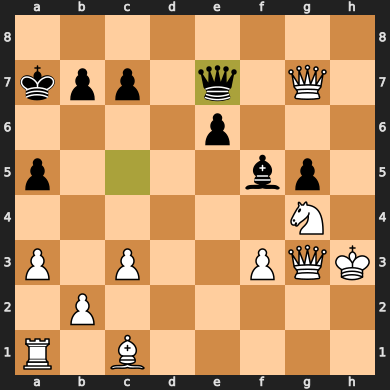


episode  95   color: True


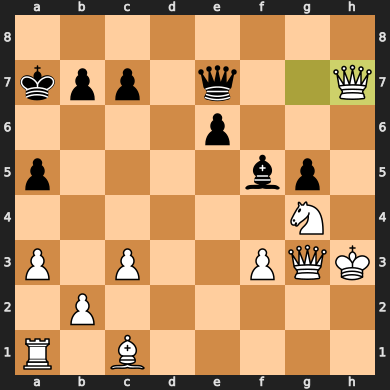


episode  96   color: False


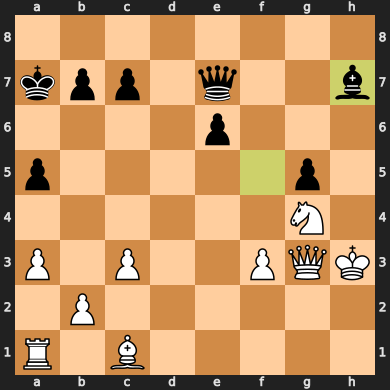


episode  97   color: True


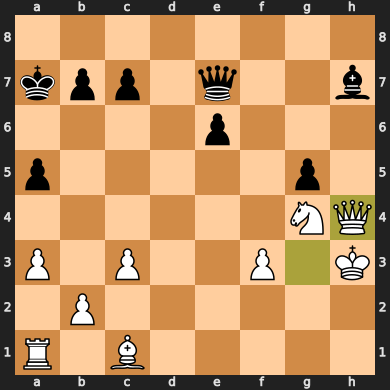


episode  98   color: False


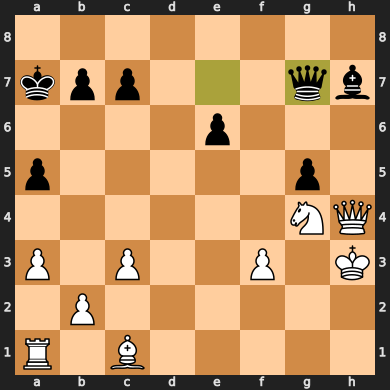


episode  99   color: True


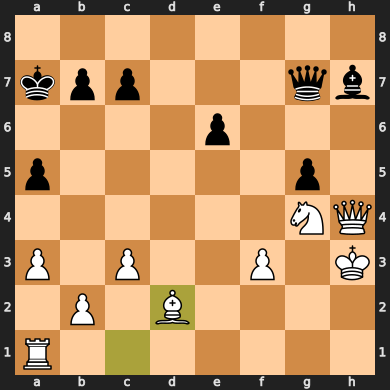


episode  100   color: False


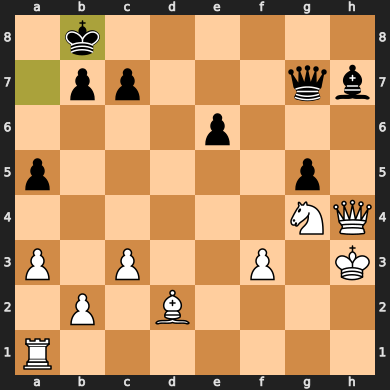


episode  101   color: True


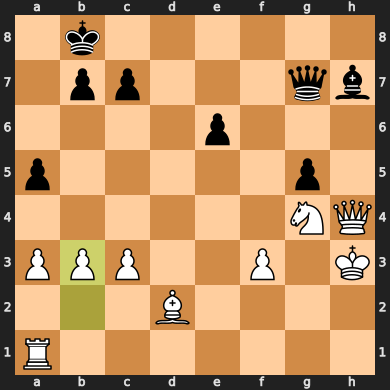


episode  102   color: False


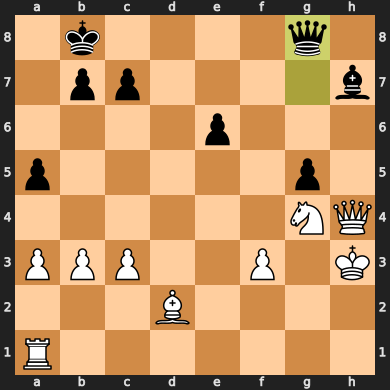


episode  103   color: True


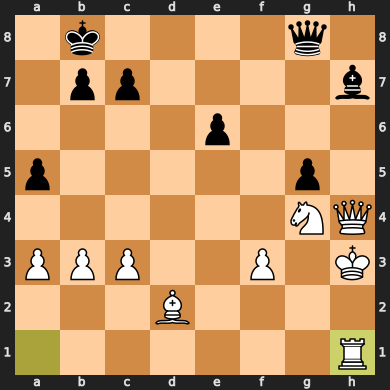


episode  104   color: False


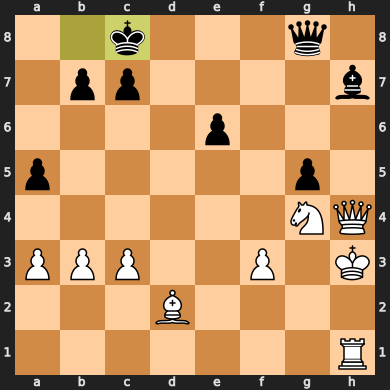


episode  105   color: True


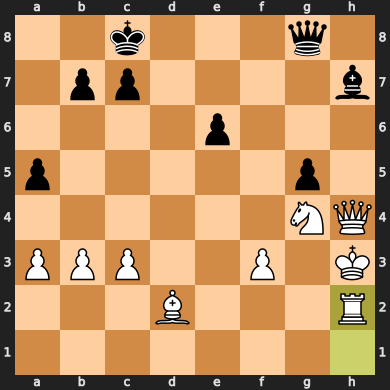


episode  106   color: False


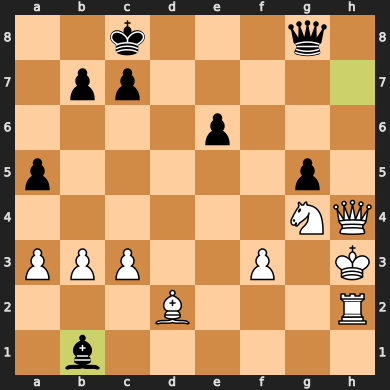


episode  107   color: True


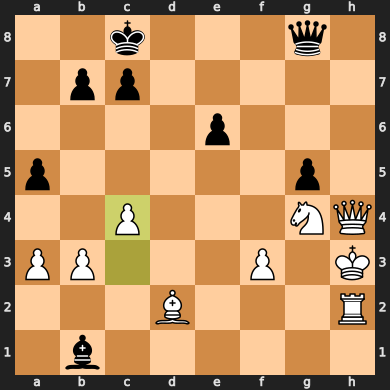


episode  108   color: False


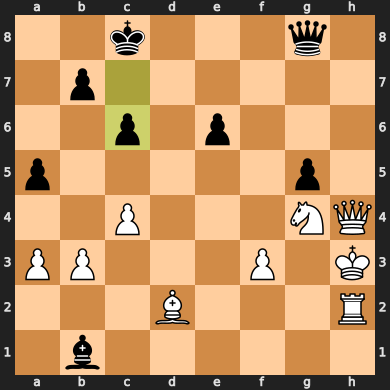


episode  109   color: True


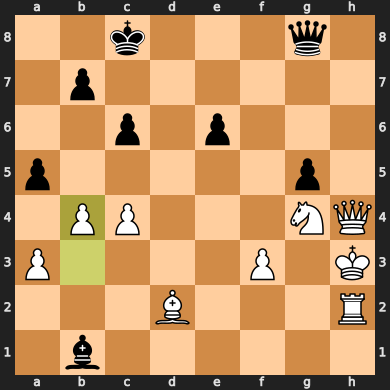


episode  110   color: False


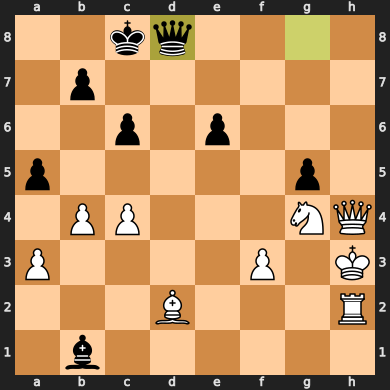


episode  111   color: True


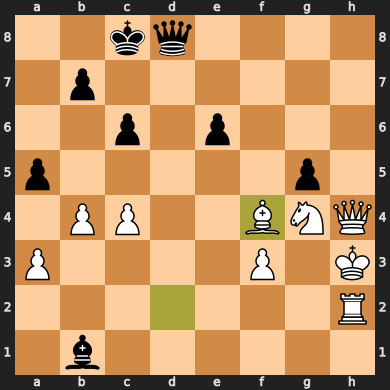


episode  112   color: False


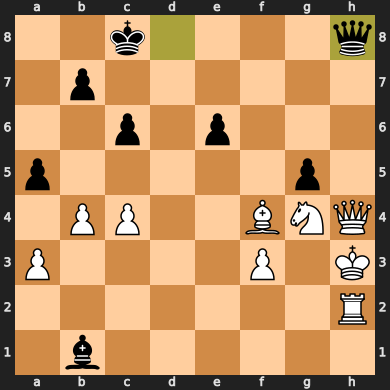


episode  113   color: True


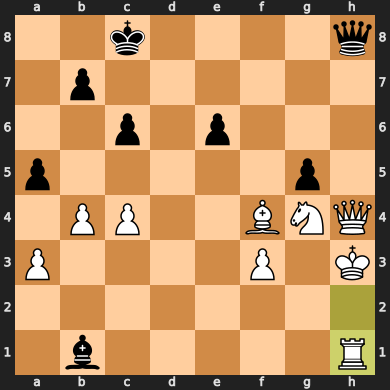


episode  114   color: False


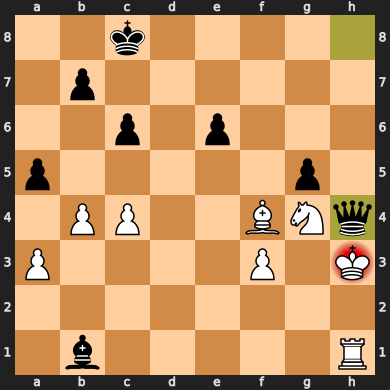


episode  115   color: True


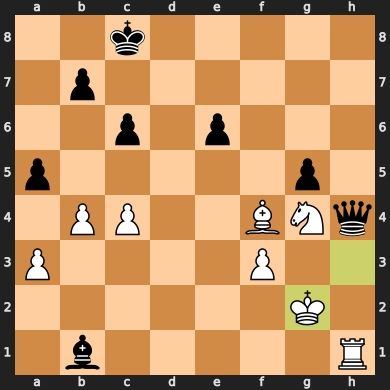


episode  116   color: False


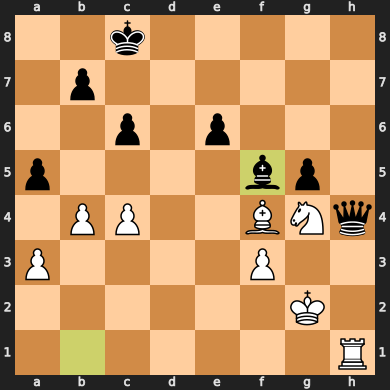


episode  117   color: True


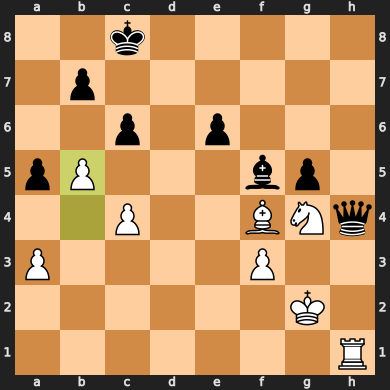


episode  118   color: False


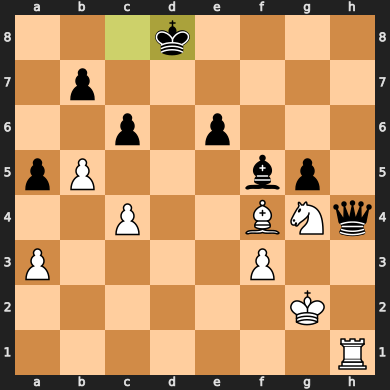


episode  119   color: True


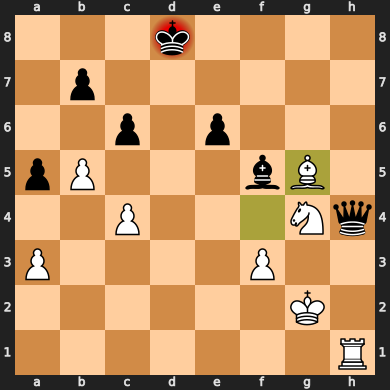


episode  120   color: False


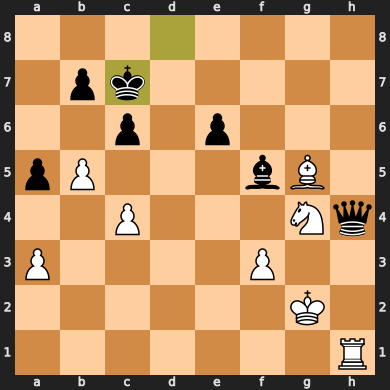


episode  121   color: True


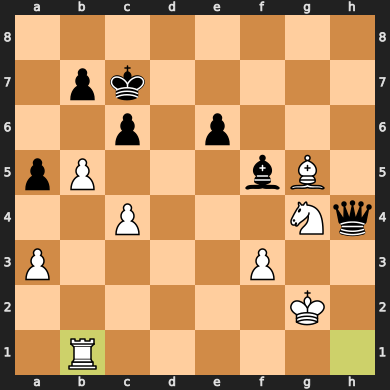


episode  122   color: False


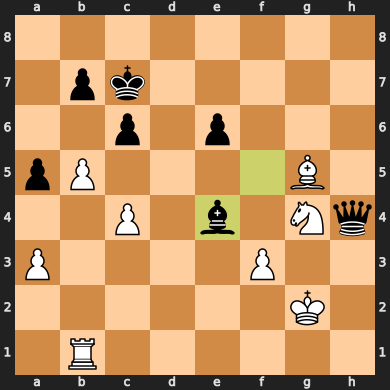


episode  123   color: True


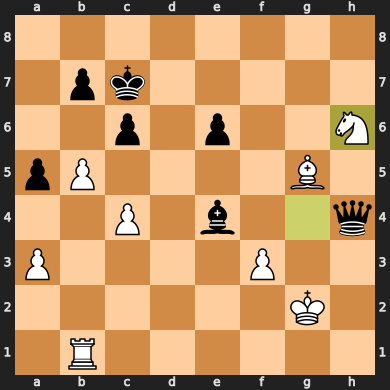


episode  124   color: False


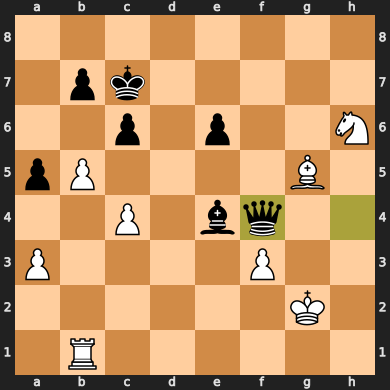


episode  125   color: True


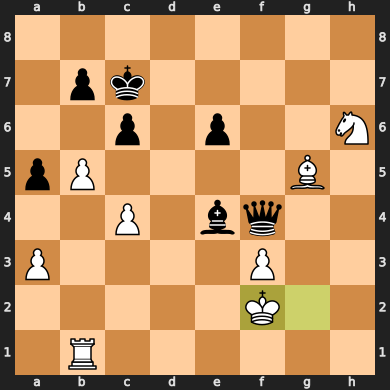


episode  126   color: False


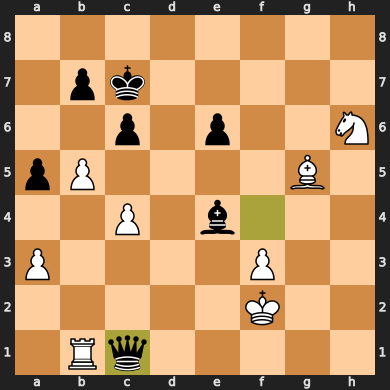


episode  127   color: True


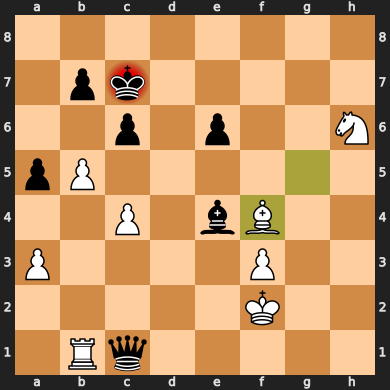


episode  128   color: False


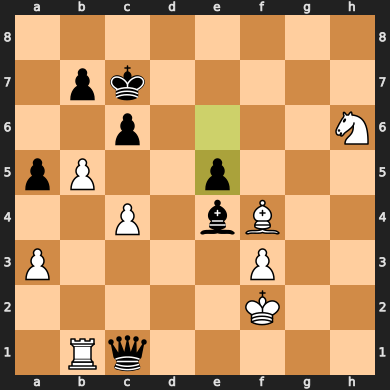


episode  129   color: True


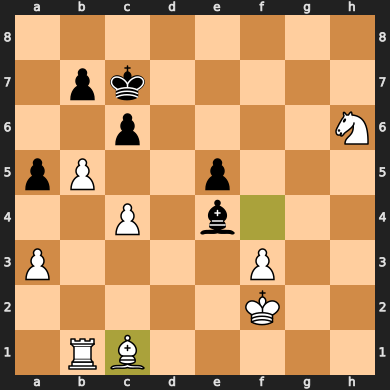


episode  130   color: False


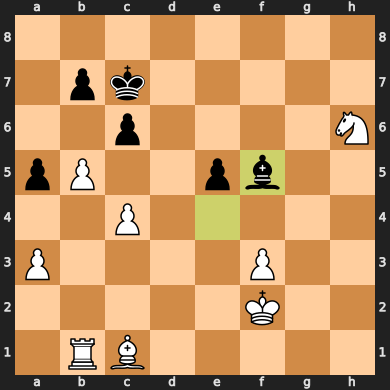


episode  131   color: True


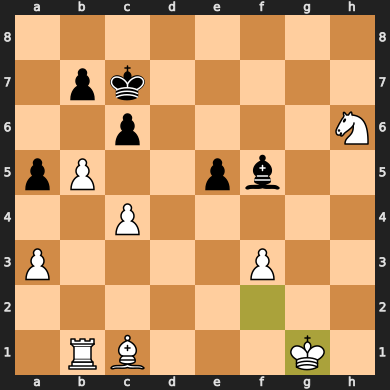


episode  132   color: False


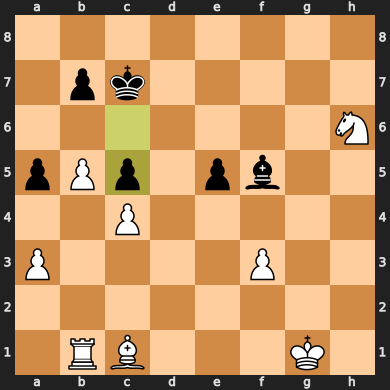


episode  133   color: True


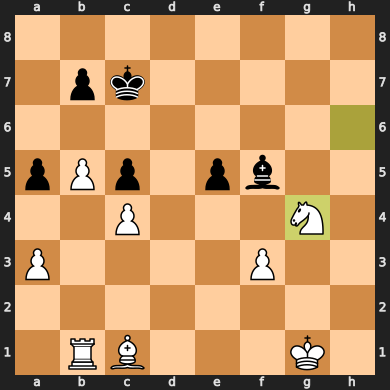


episode  134   color: False


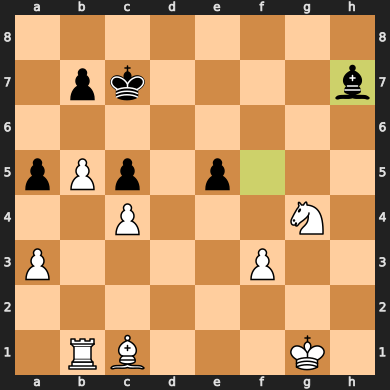


episode  135   color: True


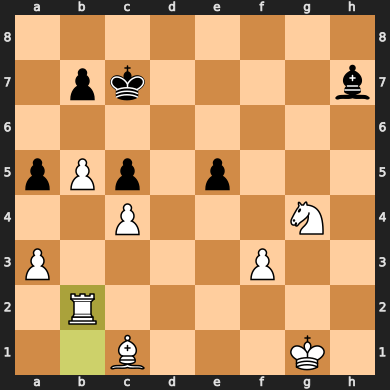


episode  136   color: False


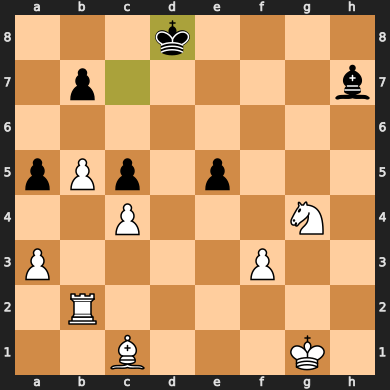


episode  137   color: True


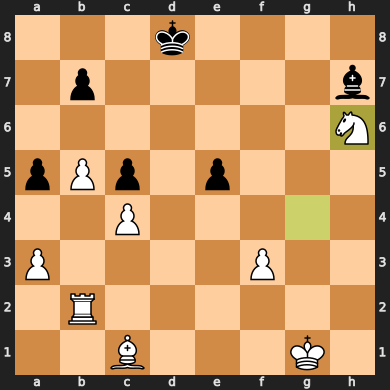


episode  138   color: False


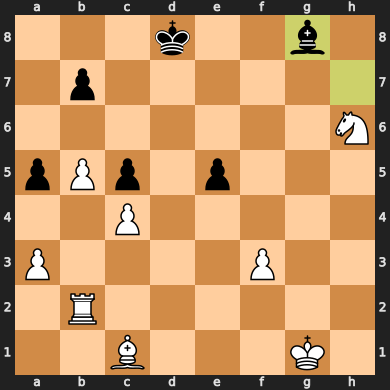


episode  139   color: True


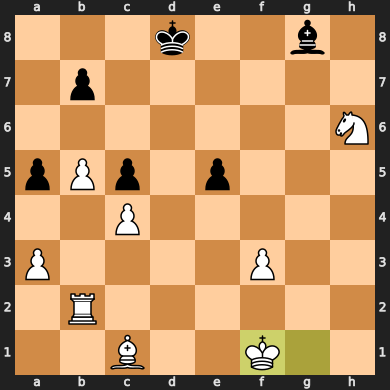


episode  140   color: False


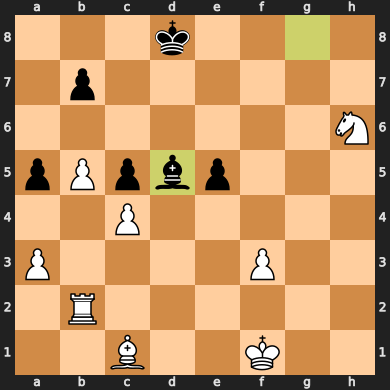


episode  141   color: True


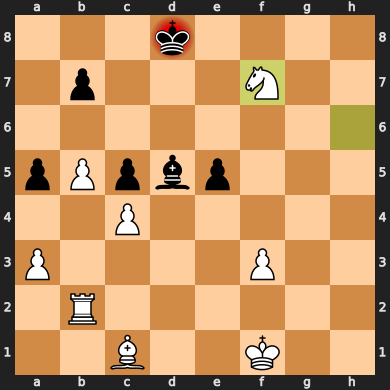


episode  142   color: False


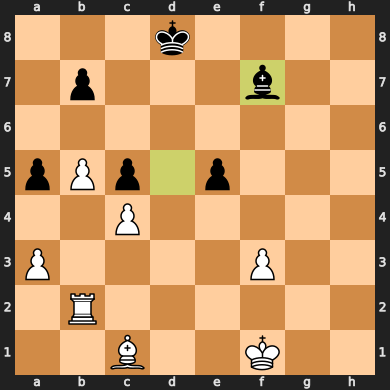


episode  143   color: True


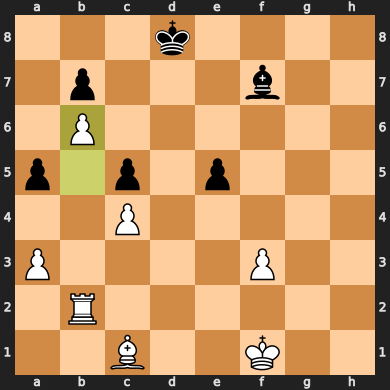


episode  144   color: False


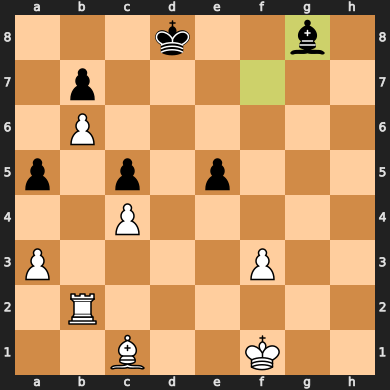


episode  145   color: True


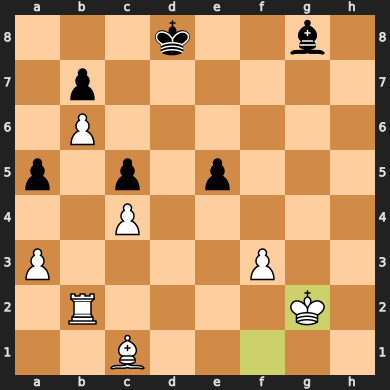


episode  146   color: False


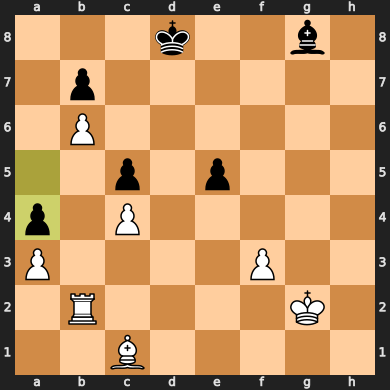


episode  147   color: True


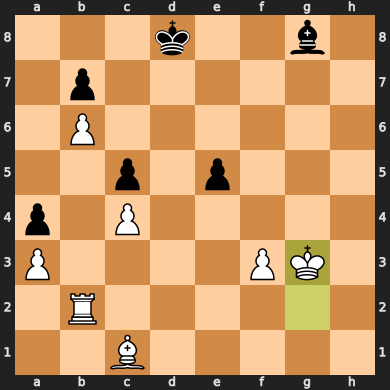


episode  148   color: False


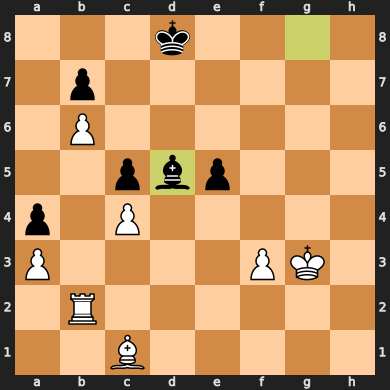


episode  149   color: True


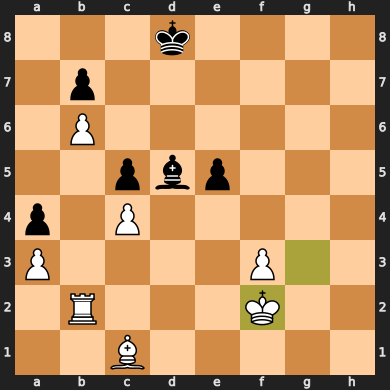


episode  150   color: False


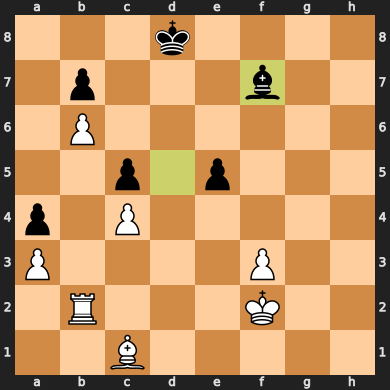


episode  151   color: True


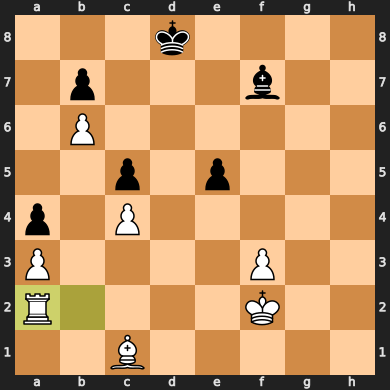


episode  152   color: False


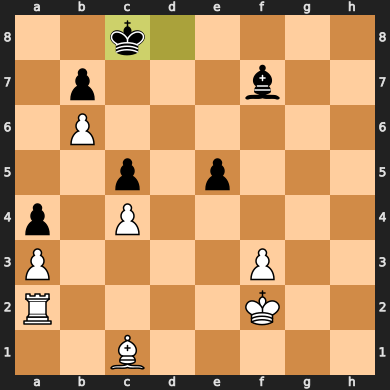


episode  153   color: True


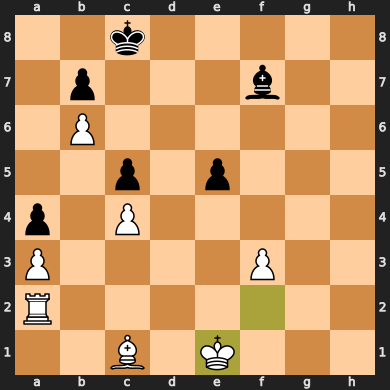


episode  154   color: False


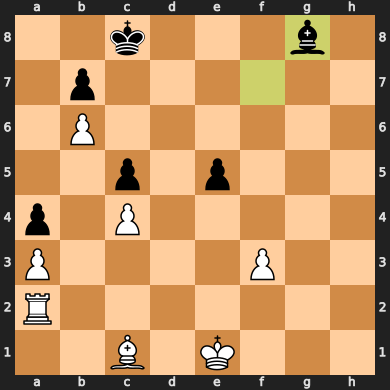


episode  155   color: True


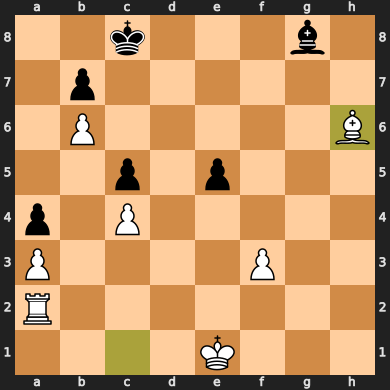


episode  156   color: False


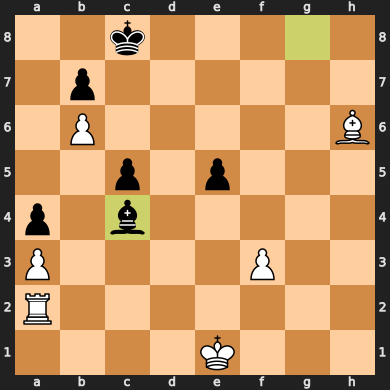


episode  157   color: True


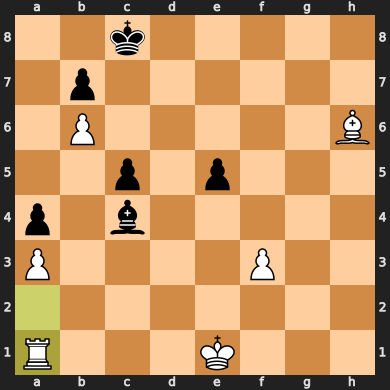


episode  158   color: False


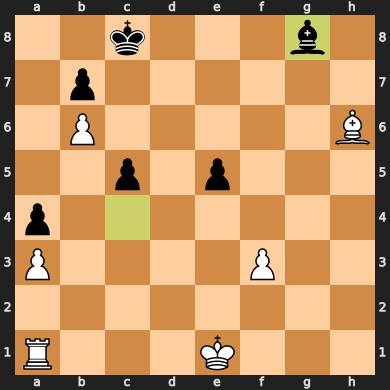


episode  159   color: True


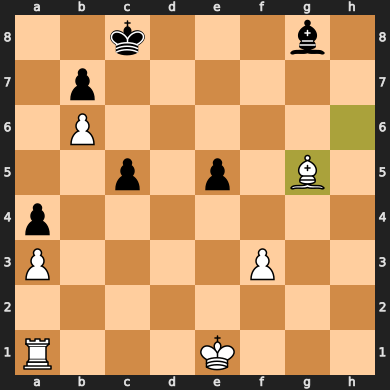


episode  160   color: False


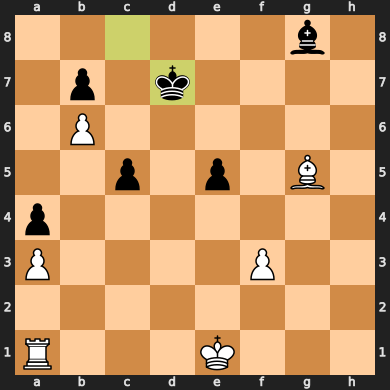


episode  161   color: True


In [ ]:
subRoot = root
episode = 0
while((not board.is_game_over()) and episode < maxEpisode):
   
    episode += 1
    print("\nepisode ", episode, "  color:", board.turn)
    maxUctChild, maxMove = mctsNext(subRoot)
    #print(board)
    board.push(maxMove)    # toggle the board.turn
       
    subRoot = maxUctChild
    display(board)
    #print(maxMove, board.turn)